### **Intro**

We are interested in the convergence rate of the Conjugate Gradient Method and it's relationship to eigenvalues distributions. This notebook is a trying to replicate the experiment presented in Professor's Greenbaum's work in chapter 3 of the book. 

We consider a $n\times n$ SPD matrix with eigenvalues paramaterized by: 

$$
\lambda_i = \lambda_1 + \frac{i - 1}{n - 1} \rho^{n - i}, i = 2, \cdots, n - 1
$$

Where $\rho$ is taken to be a number between $0, 1$. 

In [82]:
# Load up the things first. 
include("SubspaceProjectionMethods.jl")
Sproj = SubspaceProjectionMethods
using LinearAlgebra
using Logging
using Plots

Visualize the Distribution of the Eigenvalues on the realline. 

The expression generate a sequence of increasing eigenvalues. The sequence is oncreasing like the function $i\rho^i$, uniform when $\rho = 1$. 

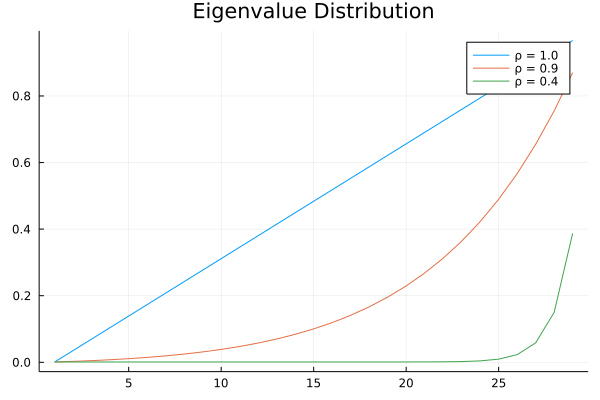

29-element Vector{Float64}:
 0.001
 0.0010000000002484744
 0.0010000000012423723
 0.0010000000046588961
 0.001000000015529654
 0.0010000000485301684
 0.0010000001455905052
 0.0010000004246389735
 0.00100000121325421
 0.0010000034122774656
 ⋮
 0.0011807889655172416
 0.001474571034482759
 0.002242924137931035
 0.0042485517241379325
 0.009474482758620693
 0.023068965517241382
 0.0583793103448276
 0.14996551724137933
 0.3872068965517242

In [83]:
n = 30
λ1 = 0.001
fig = plot(title="Eigenvalue Distribution")
for ρ = [1, 0.9, 0.4]
    EigenValues = Vector{Float64}()
    for i in 1: n - 1 
        push!(EigenValues, λ1 + ((i - 1)/(n - 1))*ρ^(n - i))
    end
    plot!(fig, EigenValues, label="ρ = $(ρ)")
end
display(fig)
display(EigenValues)

In [84]:
"""
    Bad eigen value distribution, they are distributed from 0.001 to 1 like a 
    geometric series. 
     
    * A lot of small eigenvalues are clustered close to zero, few larger ones are 
    far away from the other Eigenvalues. 

    Parameters:
        rho: Number: 
            An number between 0 and 1 that paramaterize the distribution of the eigenvalues for the PSD matrix. 
        N=20: 
            The size of the PSD matrix.
    
    returns: 
        Q^TΛQ: Where Q is a random unitary matrix. 
"""
function GetNastyPSDMatrix(rho::Number, N=20)
    @assert rho <= 1 && rho >= 0
    A = rand(N, N)
    Q, _ = qr(A)
    EigenValues = zeros(N)
    EigenMin, EigenMax = 0.001, 1    # Min Max Eigenvalues. 
    EigenValues[1], EigenValues[end] = EigenMin, EigenMax
    for IdexI in 2:N-1
        EigenValues[IdexI] = EigenMin + 
            ((IdexI - 1)/(N - 1))*(EigenMax - EigenMin)*rho^(N - IdexI)  # formulas
    end
    return Q*diagm(EigenValues)*Q'
end

"""
    Perform the Conjugate Gradient method using the IterativeCGViaLanczos method. 
    
    Parameters: 
        A: The matrix.
        b: The vector on the RHS. 
    returns

"""
function RunCGTillEnd(A, b, Maxitr=100, epsilon=1e-8)
    cg = Sproj.IterativeCGViaLanczos(A, b)
    Xs = Vector{typeof(b)}()
    Rs = Vector()
    push!(Xs, cg.x)  # intial guess added. 
    Counter = 0
    while Counter < Maxitr
        Norm2 = cg()
        if Norm2 < epsilon
            break
        end
        push!(Xs, cg.x)
        push!(Rs, Norm2)
        Counter += 1
    end
    return cg, Xs, Rs
end





RunCGTillEnd

Generate a random SPD Matrix and then try to solve it with iterative Lanczos: 

In [95]:
RandomMatrix = GetNastyPSDMatrix(0.5, 40)
RandomRHS = rand(size(RandomMatrix, 2))
CG, Result, Rs = RunCGTillEnd(RandomMatrix, RandomRHS)
# Residual Norm Progression: 
fig = plot(title="Residual 2 Norm")
plot!(fig, Rs)
display(Rs)
display(norm(RandomRHS - RandomMatrix*CG.x))

14-element Vector{Any}:
    20.866611501189897
   371.61686044563146
  1551.2457598409792
  5508.225748639136
 10426.075712660318
 13519.461923769359
  7241.3867987874555
  1657.7360008858525
   113.39312886892881
    47.83634961828722
     1.2084054042629686
     0.006538721883799896
     0.00014572914728374852
     4.4306139067050404e-7

0.000539840438504066

In [96]:
norm(RandomRHS - RandomMatrix*CG.x)


0.000539840438504066